In [537]:
import pandas as pd
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pmdarima as pm
import itertools

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import acf, pacf
from datetime import datetime
from scipy import stats
from scipy.stats import boxcox
import statsmodels.tsa as smt


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [538]:
df = pd.read_csv('final_data.csv')
df['DateTime'] = pd.to_datetime(df['DateTime'])
df.set_index('DateTime', inplace = True)
df

,PM2.5,O3,temp,direction
DateTime,,,,
2019-01-01,19.0,0.024,0.1,340
2019-01-02,11.0,0.024,0.5,320
2019-01-03,13.0,0.019,1.4,340
2019-01-04,17.0,0.010,4.3,340
2019-01-05,52.0,0.029,4.3,340
...,...,...,...,...
2021-12-27,7.0,0.034,-1.7,290
2021-12-28,23.0,0.020,3.2,340
2021-12-29,23.0,0.025,4.8,250


## PM 2.5

<AxesSubplot:xlabel='DateTime'>

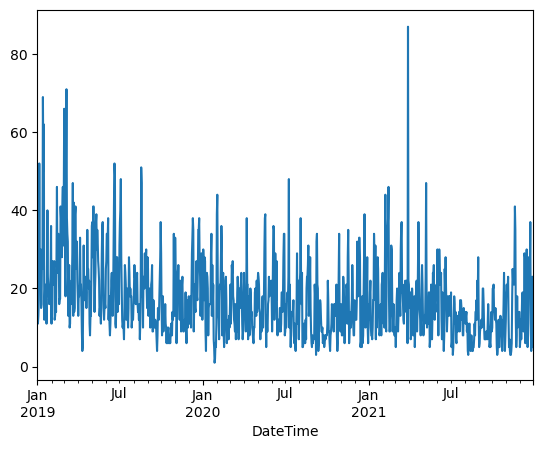

In [539]:
df['PM2.5'].plot()

In [540]:
df.shift(1)

,PM2.5,O3,temp,direction
DateTime,,,,
2019-01-01,NaN,NaN,NaN,NaN
2019-01-02,19.0,0.024,0.1,340.0
2019-01-03,11.0,0.024,0.5,320.0
2019-01-04,13.0,0.019,1.4,340.0
2019-01-05,17.0,0.010,4.3,340.0
...,...,...,...,...
2021-12-27,4.0,0.036,-5.9,290.0
2021-12-28,7.0,0.034,-1.7,290.0
2021-12-29,23.0,0.020,3.2,340.0


In [541]:
df.iloc[:,1:].reset_index(drop = True)

,O3,temp,direction
0,0.024,0.1,340
1,0.024,0.5,320
2,0.019,1.4,340
3,0.010,4.3,340
4,0.029,4.3,340
...,...,...,...
1091,0.034,-1.7,290
1092,0.020,3.2,340
1093,0.025,4.8,250
1094,0.037,1.8,290


Text(0, 0.5, 'PM 2.5')

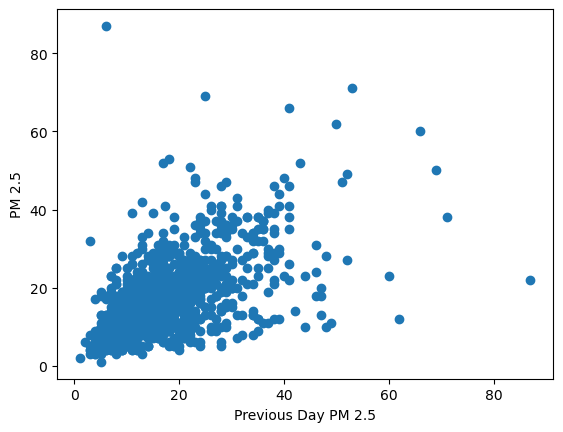

In [542]:
plt.scatter(df.shift(1)['PM2.5'].iloc[1:],df['PM2.5'].iloc[1:])
plt.xlabel('Previous Day PM 2.5')
plt.ylabel('PM 2.5')

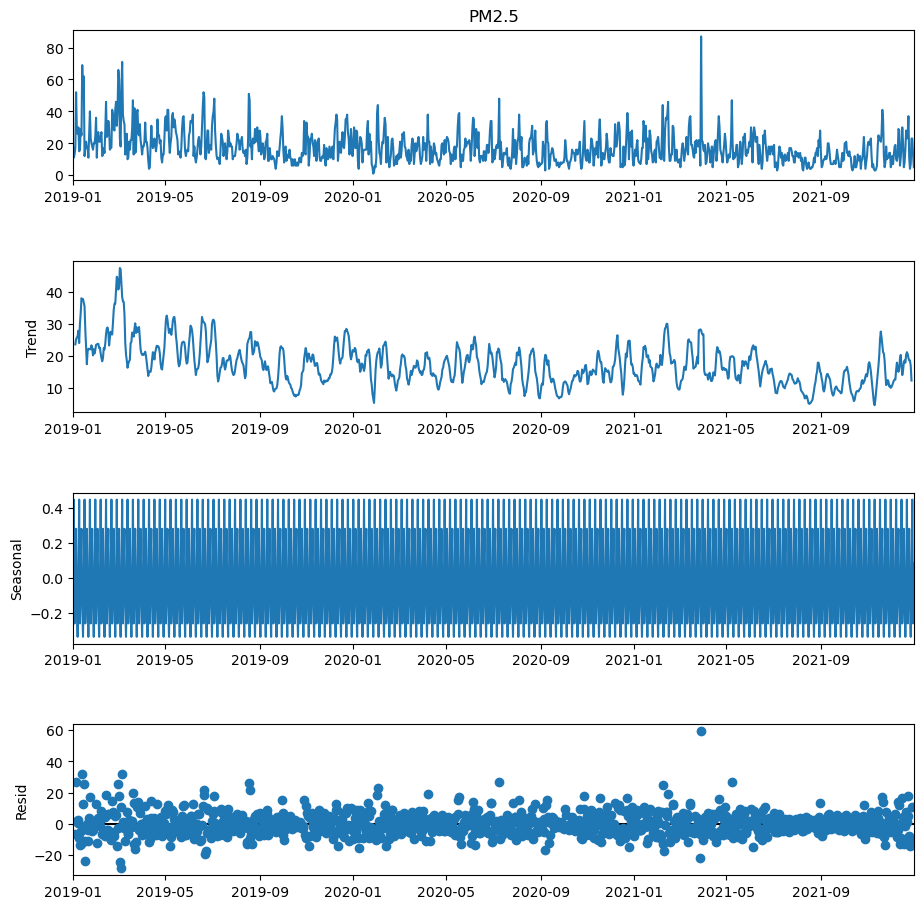

In [543]:
decomposition= sm.tsa.seasonal_decompose(df['PM2.5'], model='additive')

ax = decomposition.plot()
ax.set_size_inches(10,10)

plt.show()

## O3

<AxesSubplot:xlabel='DateTime'>

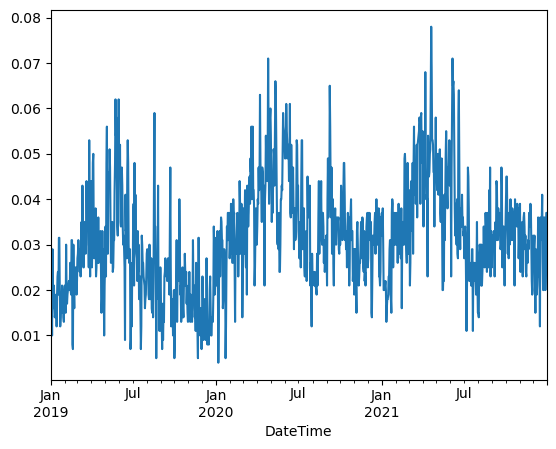

In [544]:
df['O3'].plot()

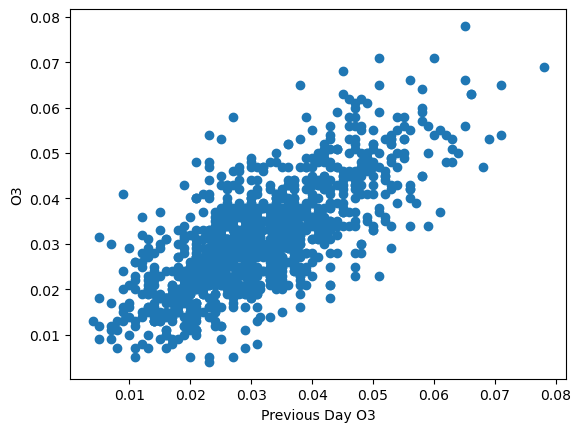

In [545]:
plt.scatter(df.shift(1)['O3'].iloc[1:],df['O3'].iloc[1:])
plt.xlabel('Previous Day O3')
plt.ylabel('O3');

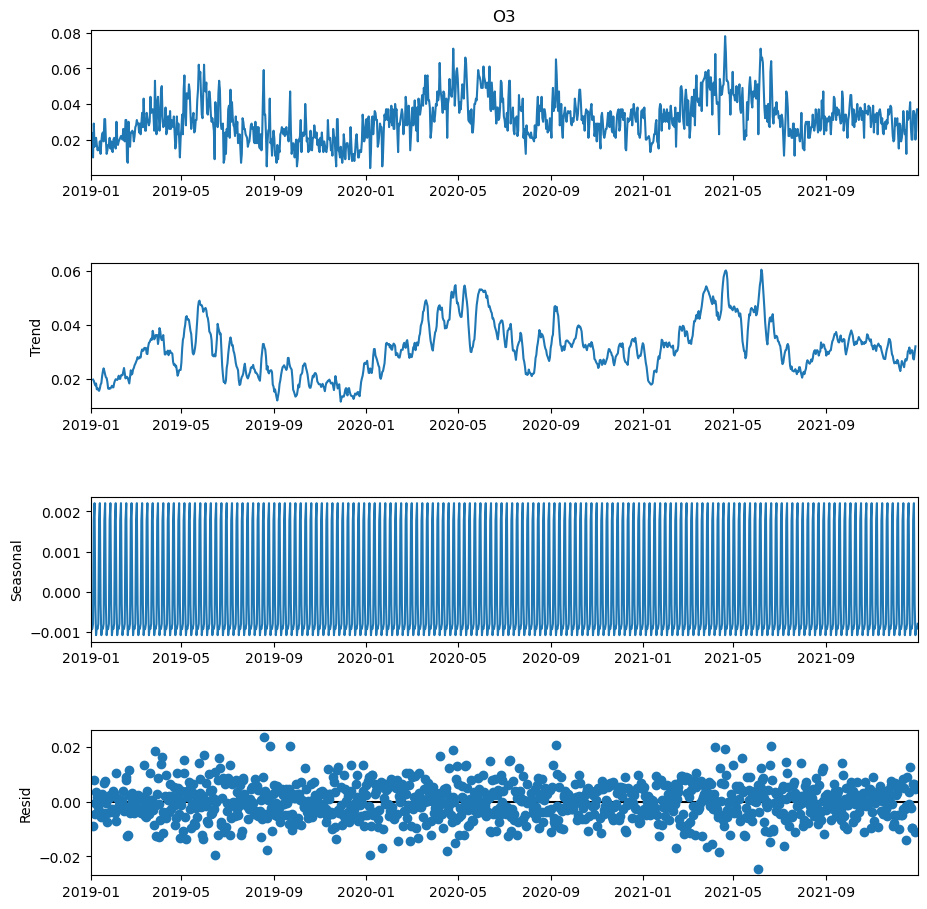

In [546]:
decomposition= sm.tsa.seasonal_decompose(df['O3'], model='additive')

ax = decomposition.plot()
ax.set_size_inches(10,10)

plt.show()


In [547]:
df

,PM2.5,O3,temp,direction
DateTime,,,,
2019-01-01,19.0,0.024,0.1,340
2019-01-02,11.0,0.024,0.5,320
2019-01-03,13.0,0.019,1.4,340
2019-01-04,17.0,0.010,4.3,340
2019-01-05,52.0,0.029,4.3,340
...,...,...,...,...
2021-12-27,7.0,0.034,-1.7,290
2021-12-28,23.0,0.020,3.2,340
2021-12-29,23.0,0.025,4.8,250


In [548]:
# ADF test

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import acf, pacf
from datetime import datetime
from scipy import stats
from scipy.stats import boxcox
import statsmodels.tsa as smt

adf_test = adfuller(df['O3'].diff(periods=1).iloc[1:])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %20.20f' % adf_test[1])

ADF Statistic: -14.694330
Critical Values @ 0.05: -2.86
p-value: 0.00000000000000000000


## Multivariate LSTM

In [549]:
# Splitting for train and test data - 80% trainig set and 20% test set

In [2248]:
df

,PM2.5,O3,temp,direction
DateTime,,,,
2019-01-01,19.0,0.024,0.1,340
2019-01-02,11.0,0.024,0.5,320
2019-01-03,13.0,0.019,1.4,340
2019-01-04,17.0,0.010,4.3,340
2019-01-05,52.0,0.029,4.3,340
...,...,...,...,...
2021-12-27,7.0,0.034,-1.7,290
2021-12-28,23.0,0.020,3.2,340
2021-12-29,23.0,0.025,4.8,250


In [2249]:
df.iloc[:877,1:]

,O3,temp,direction
DateTime,,,
2019-01-01,0.024,0.1,340
2019-01-02,0.024,0.5,320
2019-01-03,0.019,1.4,340
2019-01-04,0.010,4.3,340
2019-01-05,0.029,4.3,340
...,...,...,...
2021-05-22,0.050,19.8,340
2021-05-23,0.055,23.7,200
2021-05-24,0.049,19.6,110


In [2466]:
df_train = df.iloc[:877,1:].reset_index(drop = True)
df_test = df.iloc[877:,1:].reset_index(drop = True)

In [2467]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_train_scaled = sc.fit_transform(df_train)
print(df_train_scaled.shape)

(877, 3)


In [2468]:
sc2 = StandardScaler()
y_train = sc2.fit_transform(df_train[['O3']])
y_train.shape

(877, 1)

In [2469]:
window_size = 5
X_train = []
y_train1 = []
for i in range(5,len(df_train_scaled)-4):
    X_train.append(df_train_scaled[i-5:i])
    y_train1.append(y_train.flatten()[i:(i+5)])
X_train, y_train1 = np.array(X_train), np.array(y_train1)

In [2470]:
y_train1

array([[-1.23591662, -1.15520064, -0.83233669, -1.15520064, -1.39734859],
       [-1.15520064, -0.83233669, -1.15520064, -1.39734859, -1.31663261],
       [-0.83233669, -1.15520064, -1.39734859, -1.31663261, -1.39734859],
       ...,
       [-0.02517683,  0.78198304,  1.50842692,  1.91200685,  1.42771093],
       [ 0.78198304,  1.50842692,  1.91200685,  1.42771093,  0.78198304],
       [ 1.50842692,  1.91200685,  1.42771093,  0.78198304,  0.53983508]])

In [2471]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, BatchNormalization

In [2472]:
from tensorflow.keras import layers, callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
    
)

In [2473]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid= train_test_split(X_train,y_train1, test_size=0.1, random_state=0)

In [2474]:
tf.random.set_seed(42)
model = Sequential()
model.add(LSTM(128,  activation = 'linear',return_sequences=True, kernel_regularizer=regularizers.L2(0.01),input_shape=(5,3)))
#model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(LSTM(128,activation = 'linear', kernel_regularizer=regularizers.L2(0.01)))
#model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(5, kernel_regularizer=regularizers.L2(0.01)))
model.compile(loss='mse',optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))


history = model.fit(X_train, y_train,
    batch_size=128,
    epochs=200,validation_data=(X_valid, y_valid),callbacks = [early_stopping])

Epoch 1/200
7/7 [==============================] - 13s 216ms/step - loss: 3.6631 - val_loss: 3.1470
Epoch 2/200
7/7 [==============================] - 0s 55ms/step - loss: 2.8675 - val_loss: 3.0635
Epoch 3/200
7/7 [==============================] - 0s 56ms/step - loss: 2.6883 - val_loss: 2.9780
Epoch 4/200
7/7 [==============================] - 0s 58ms/step - loss: 2.5775 - val_loss: 2.8846
Epoch 5/200
7/7 [==============================] - 0s 55ms/step - loss: 2.4692 - val_loss: 2.8032
Epoch 6/200
7/7 [==============================] - 0s 59ms/step - loss: 2.3681 - val_loss: 2.7081
Epoch 7/200
7/7 [==============================] - 0s 60ms/step - loss: 2.2778 - val_loss: 2.6269
Epoch 8/200
7/7 [==============================] - 0s 58ms/step - loss: 2.2205 - val_loss: 2.5383
Epoch 9/200
7/7 [==============================] - 0s 58ms/step - loss: 2.1047 - val_loss: 2.4612
Epoch 10/200
7/7 [==============================] - 0s 55ms/step - loss: 2.0227 - val_loss: 2.3924
Epoch 11/200
7/7 

7/7 [==============================] - 0s 60ms/step - loss: 0.6698 - val_loss: 0.8043
Epoch 84/200
7/7 [==============================] - 0s 66ms/step - loss: 0.6763 - val_loss: 0.8119
Epoch 85/200
7/7 [==============================] - 1s 71ms/step - loss: 0.6718 - val_loss: 0.7914
Epoch 86/200
7/7 [==============================] - 1s 63ms/step - loss: 0.6633 - val_loss: 0.7592
Epoch 87/200
7/7 [==============================] - 0s 56ms/step - loss: 0.6613 - val_loss: 0.7785
Epoch 88/200
7/7 [==============================] - 0s 66ms/step - loss: 0.6632 - val_loss: 0.7923
Epoch 89/200
7/7 [==============================] - 0s 64ms/step - loss: 0.6531 - val_loss: 0.7067
Epoch 90/200
7/7 [==============================] - 0s 68ms/step - loss: 0.6578 - val_loss: 0.7096
Epoch 91/200
7/7 [==============================] - 0s 56ms/step - loss: 0.6614 - val_loss: 0.7451
Epoch 92/200
7/7 [==============================] - 0s 57ms/step - loss: 0.6501 - val_loss: 0.7171
Epoch 93/200
7/7 [=====

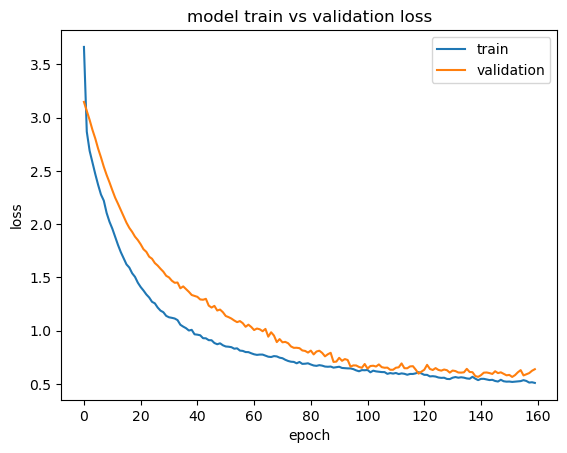

In [2475]:
# plot train and validation loss
from matplotlib import pyplot
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()


## Preparation of test dataset

In [2476]:
df_train_last7 = df_train.iloc[-5:]
df_test1 = pd.concat((df_train_last7, df_test), axis = 0)
df_test1.head()

,O3,temp,direction
872,0.050,19.8,340
873,0.055,23.7,200
874,0.049,19.6,110
875,0.041,19.0,270
876,0.038,18.3,200


In [2477]:
df_test2 = sc.transform(df_test1)

In [2478]:
y_t = sc2.transform(df_test1[['O3']])

In [2479]:
window_size = 5
X_test = []
y_test1 = []
for i in range(5,len(df_test1)-4):
    X_test.append(df_test2[i-5:i])
    y_test1.append(y_t.flatten()[i:(i+5)])
X_test, y_test1 = np.array(X_test), np.array(y_test1)

In [2480]:
y_test = model.predict(X_test)

7/7 [==============================] - 4s 14ms/step


In [2481]:
evaluation = pd.DataFrame({'Metric': ['MSE'],
                           'Training set': [mean_squared_error(y_train, model.predict(X_train))],
                           'Testing set': [mean_squared_error(y_test1.flatten(), y_test.flatten())]})
evaluation = evaluation.set_index('Metric')
evaluation

25/25 [==============================] - 1s 21ms/step


,Training set,Testing set
Metric,,
MSE,0.433804,0.604041


In [2482]:
y_test = sc2.inverse_transform(y_test)
y_test

array([[0.03686643, 0.04146451, 0.04432974, 0.04365109, 0.03867341],
       [0.04401259, 0.04641461, 0.04805455, 0.04683811, 0.03923231],
       [0.04273187, 0.04499504, 0.04259222, 0.04173663, 0.03936902],
       ...,
       [0.02715823, 0.02949846, 0.02979735, 0.03117807, 0.03171282],
       [0.03120191, 0.02925535, 0.02942944, 0.03091643, 0.03155732],
       [0.02966399, 0.03106054, 0.03159537, 0.0308874 , 0.02831172]],
      dtype=float32)

In [2483]:
final_df = pd.DataFrame(y_test.flatten())
final_df.columns = ['y_test']
final_df

,y_test
0,0.036866
1,0.041465
2,0.044330
3,0.043651
4,0.038673
...,...
1070,0.029664
1071,0.031061
1072,0.031595
1073,0.030887


In [2484]:
y_test1 = sc2.inverse_transform(y_test1)
final_df['true value'] = y_test1.flatten()

In [2485]:
final_df

,y_test,true value
0,0.036866,0.047
1,0.041465,0.044
2,0.044330,0.047
3,0.043651,0.053
4,0.038673,0.043
...,...,...
1070,0.029664,0.034
1071,0.031061,0.020
1072,0.031595,0.025
1073,0.030887,0.037


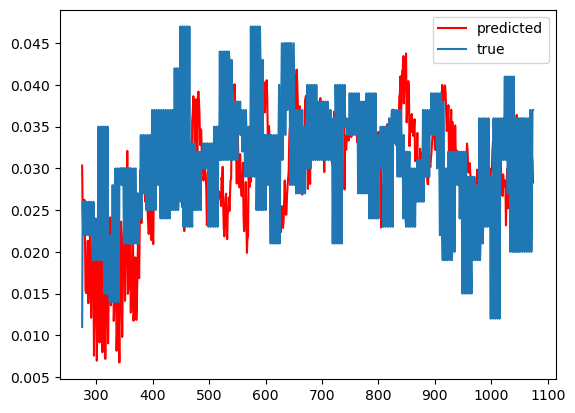

In [2486]:
plt.plot(final_df['y_test'].iloc[-800:], label = 'predicted', color = 'red')
plt.plot(final_df['true value'].iloc[-800:], label = 'true')
pyplot.legend(['predicted', 'true'], loc='upper right')
plt.show()

In [2487]:
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(y_test1.flatten(), y_test.flatten())

9.271440894221205e-05

In [2488]:
import datetime
start = datetime.datetime.strptime("2022-01-01", "%Y-%m-%d")

In [2489]:
from dateutil.relativedelta import relativedelta
date_list = [start + relativedelta(days=x) for x in range(0,5)]
future_prediction = pd.DataFrame(index=date_list, columns= df.columns)
df1= pd.concat([df, future_prediction])
df1

,PM2.5,O3,temp,direction
2019-01-01,19.0,0.024,0.1,340
2019-01-02,11.0,0.024,0.5,320
2019-01-03,13.0,0.019,1.4,340
2019-01-04,17.0,0.010,4.3,340
2019-01-05,52.0,0.029,4.3,340
...,...,...,...,...
2022-01-01,NaN,NaN,NaN,NaN
2022-01-02,NaN,NaN,NaN,NaN
2022-01-03,NaN,NaN,NaN,NaN
2022-01-04,NaN,NaN,NaN,NaN


In [2490]:
X_test1 = []
X_test1.append(df1.iloc[-10:-5,1:])
X_test1 = np.array(X_test1)
X_test1 = sc.transform(X_test1.reshape(-1, X_test1.shape[-1])).reshape(X_test1.shape)

In [2491]:
y = sc2.inverse_transform(model.predict(X_test1))
y

1/1 [==============================] - 0s 86ms/step


array([[0.02508746, 0.02086986, 0.0244047 , 0.02370357, 0.02570923]],
      dtype=float32)

In [2492]:
l = []
l.append(df1.iloc[-10:-5,1:].values[-1][0])
for i in range(len(y[-1])):
    l.append(y[-1][i])
l

[0.037, 0.025087465, 0.02086986, 0.0244047, 0.023703566, 0.025709229]

In [2493]:
lastData = df1.iloc[-35:-5,1].values

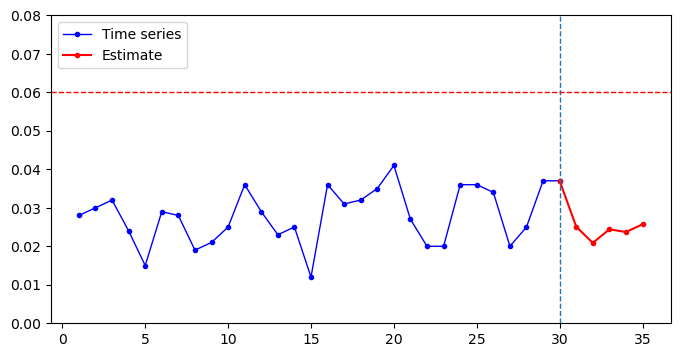

In [2494]:
ax1 = np.arange(1, len(lastData) + 1)

ax2 = np.arange(len(lastData), len(lastData) + len(l))

plt.figure(figsize=(8, 4))

plt.plot(ax1, lastData, 'b-o', color='blue', markersize=3, label='Time series', linewidth=1)

plt.plot(ax2, l, 'b-o', color='red', markersize=3, label='Estimate')

plt.axvline(x=ax1[-1],  linestyle='dashed', linewidth=1)

plt.legend()
plt.ylim(0, 0.08)
plt.axhline(y =0.06,  linestyle='dashed', linewidth=1, color = 'red')
plt.show()

## Univariate LSTM for O3

In [2111]:
df_train = df.iloc[:877,:].reset_index(drop = True)
df_test = df.iloc[877:,:].reset_index(drop = True)

In [1385]:
from tensorflow.keras import regularizers

In [1530]:
tf.random.set_seed(1234)
print(tf.random.uniform([1]).numpy())
print(tf.random.uniform([1]).numpy())

[0.5380393]
[0.3253647]


In [2112]:
from numpy.random import seed
seed(1)
from tensorflow.random import set_seed
set_seed(2)
scaler = StandardScaler()
y_train1 = scaler.fit_transform(df_train[['O3']])
# generate the input and output sequences
n_lookback = 60 # length of input sequences (lookback period)
n_forecast = 30 # length of output sequences (forecast period)



X = []
Y = []
for i in range(n_lookback, len(y_train1) - n_forecast + 1):
    X.append(y_train1.flatten()[i - n_lookback: i])
    Y.append(y_train1.flatten()[i: i + n_forecast])

X = np.array(X)
Y = np.array(Y)
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid= train_test_split(X,Y, test_size=0.1, random_state=42)

# fit the model
model = Sequential()
model.add(LSTM(128,  activation = 'linear', return_sequences=True, input_shape=(60,1)))
model.add(Dropout(0.3))
#model.add(BatchNormalization())
model.add(LSTM(128,  activation = 'linear'))
model.add(Dropout(0.3))
#model.add(BatchNormalization())
model.add(Dense(30))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.002), loss='mse')
history = model.fit(X_train, y_train,
    batch_size=128,
    epochs=200,validation_data=(X_valid, y_valid))


#kernel_initializer="he_normal", kernel_regularizer=keras.regularizers.l2(0.01)


Epoch 1/200
6/6 [==============================] - 9s 555ms/step - loss: 0.8944 - val_loss: 0.7307
Epoch 2/200
6/6 [==============================] - 3s 433ms/step - loss: 0.8021 - val_loss: 0.7313
Epoch 3/200
6/6 [==============================] - 3s 437ms/step - loss: 0.7996 - val_loss: 0.7162
Epoch 4/200
6/6 [==============================] - 3s 459ms/step - loss: 0.7622 - val_loss: 0.7299
Epoch 5/200
6/6 [==============================] - 3s 469ms/step - loss: 0.7370 - val_loss: 0.6816
Epoch 6/200
6/6 [==============================] - 3s 432ms/step - loss: 0.7214 - val_loss: 0.6805
Epoch 7/200
6/6 [==============================] - 3s 479ms/step - loss: 0.7164 - val_loss: 0.6792
Epoch 8/200
6/6 [==============================] - 3s 460ms/step - loss: 0.7084 - val_loss: 0.6769
Epoch 9/200
6/6 [==============================] - 3s 441ms/step - loss: 0.7104 - val_loss: 0.6768
Epoch 10/200
6/6 [==============================] - 3s 440ms/step - loss: 0.7008 - val_loss: 0.6726
Epoch 11/

6/6 [==============================] - 3s 477ms/step - loss: 0.3942 - val_loss: 0.3615
Epoch 84/200
6/6 [==============================] - 3s 571ms/step - loss: 0.3892 - val_loss: 0.3656
Epoch 85/200
6/6 [==============================] - 4s 605ms/step - loss: 0.3924 - val_loss: 0.3600
Epoch 86/200
6/6 [==============================] - 3s 527ms/step - loss: 0.3897 - val_loss: 0.3499
Epoch 87/200
6/6 [==============================] - 3s 559ms/step - loss: 0.3819 - val_loss: 0.3496
Epoch 88/200
6/6 [==============================] - 4s 612ms/step - loss: 0.3815 - val_loss: 0.3524
Epoch 89/200
6/6 [==============================] - 3s 594ms/step - loss: 0.3800 - val_loss: 0.3498
Epoch 90/200
6/6 [==============================] - 3s 478ms/step - loss: 0.3748 - val_loss: 0.3485
Epoch 91/200
6/6 [==============================] - 4s 616ms/step - loss: 0.3753 - val_loss: 0.3399
Epoch 92/200
6/6 [==============================] - 3s 561ms/step - loss: 0.3680 - val_loss: 0.3400
Epoch 93/200


6/6 [==============================] - 3s 453ms/step - loss: 0.2910 - val_loss: 0.2723
Epoch 165/200
6/6 [==============================] - 3s 436ms/step - loss: 0.2898 - val_loss: 0.2718
Epoch 166/200
6/6 [==============================] - 3s 452ms/step - loss: 0.2905 - val_loss: 0.2731
Epoch 167/200
6/6 [==============================] - 3s 446ms/step - loss: 0.2901 - val_loss: 0.2747
Epoch 168/200
6/6 [==============================] - 3s 445ms/step - loss: 0.2894 - val_loss: 0.2708
Epoch 169/200
6/6 [==============================] - 3s 470ms/step - loss: 0.2868 - val_loss: 0.2735
Epoch 170/200
6/6 [==============================] - 3s 449ms/step - loss: 0.2849 - val_loss: 0.2731
Epoch 171/200
6/6 [==============================] - 3s 435ms/step - loss: 0.2858 - val_loss: 0.2685
Epoch 172/200
6/6 [==============================] - 3s 456ms/step - loss: 0.2869 - val_loss: 0.2684
Epoch 173/200
6/6 [==============================] - 3s 435ms/step - loss: 0.2829 - val_loss: 0.2663
Epoc

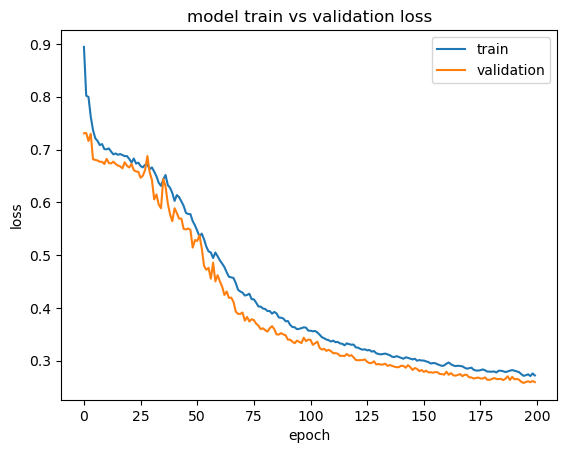

In [2113]:
# plot train and validation loss
from matplotlib import pyplot
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()


In [2118]:
df_train_last7 = df_train.iloc[-60:]
df_test1 = pd.concat((df_train_last7, df_test), axis = 0)
df_test1.tail()

,PM2.5,O3,temp,direction
214,7.0,0.034,-1.7,290
215,23.0,0.020,3.2,340
216,23.0,0.025,4.8,250
217,13.0,0.037,1.8,290
218,5.0,0.037,-1.5,320


In [2119]:
y_test2 = scaler.transform(df_test1[['O3']])

In [2120]:
X_test = []
y_test = []

for i in range(n_lookback, len(y_test2) - n_forecast + 1):
    X_test.append(y_test2.flatten()[i - n_lookback: i])
    y_test.append(y_test2.flatten()[i: i + n_forecast])

In [2121]:
X_test = np.array(X_test)
y_test = np.array(y_test)

In [2122]:
y_test

array([[ 1.26627896,  1.024131  ,  1.26627896, ..., -0.1866088 ,
         0.37840311,  0.53983508],
       [ 1.024131  ,  1.26627896,  1.75057487, ...,  0.37840311,
         0.53983508,  0.21697113],
       [ 1.26627896,  1.75057487,  0.94341501, ...,  0.53983508,
         0.21697113,  0.78198304],
       ...,
       [-0.91305268,  0.05553916, -0.26732479, ...,  0.21697113,
        -0.91305268, -0.50947274],
       [ 0.05553916, -0.26732479, -0.10589281, ..., -0.91305268,
        -0.50947274,  0.45911909],
       [-0.26732479, -0.10589281,  0.05553916, ..., -0.50947274,
         0.45911909,  0.45911909]])

In [2123]:
y_pred = model.predict(X_test)

6/6 [==============================] - 2s 83ms/step


In [2124]:
from sklearn.metrics import mean_squared_error
evaluation = pd.DataFrame({'Metric': ['MSE'],
                           'Training set': [mean_squared_error(y_train.flatten(), model.predict(X_train).flatten())],
                           'Testing set': [mean_squared_error(y_test.flatten(), model.predict(X_test).flatten())]})
evaluation = evaluation.set_index('Metric')
evaluation

6/6 [==============================] - 0s 68ms/step


,Training set,Testing set
Metric,,
MSE,0.247638,0.823267


In [2125]:
y_pred = scaler.inverse_transform(y_pred)
final_df = pd.DataFrame(y_pred.flatten())
final_df.columns = ['y_test']
final_df

,y_test
0,0.041365
1,0.038186
2,0.035455
3,0.035604
4,0.035797
...,...
5695,0.037501
5696,0.037956
5697,0.037399
5698,0.037510


In [2126]:
y_test1 = scaler.inverse_transform(y_test)
final_df['true value'] = y_test1.flatten()

In [2127]:
final_df

,y_test,true value
0,0.041365,0.047
1,0.038186,0.044
2,0.035455,0.047
3,0.035604,0.053
4,0.035797,0.043
...,...,...
5695,0.037501,0.034
5696,0.037956,0.020
5697,0.037399,0.025
5698,0.037510,0.037


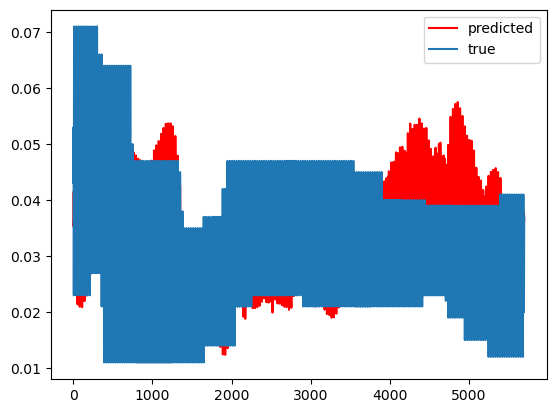

In [2128]:
plt.plot(final_df['y_test'], label = 'predicted', color = 'red')
plt.plot(final_df['true value'], label = 'true')
pyplot.legend(['predicted', 'true'], loc='upper right')
plt.show()

In [2129]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test1.flatten(), y_pred.flatten())

0.0001263635230010312

In [2130]:
y_test

array([[ 1.26627896,  1.024131  ,  1.26627896, ..., -0.1866088 ,
         0.37840311,  0.53983508],
       [ 1.024131  ,  1.26627896,  1.75057487, ...,  0.37840311,
         0.53983508,  0.21697113],
       [ 1.26627896,  1.75057487,  0.94341501, ...,  0.53983508,
         0.21697113,  0.78198304],
       ...,
       [-0.91305268,  0.05553916, -0.26732479, ...,  0.21697113,
        -0.91305268, -0.50947274],
       [ 0.05553916, -0.26732479, -0.10589281, ..., -0.91305268,
        -0.50947274,  0.45911909],
       [-0.26732479, -0.10589281,  0.05553916, ..., -0.50947274,
         0.45911909,  0.45911909]])

1/1 [==============================] - 1s 970ms/step


<AxesSubplot:title={'center':'O3'}, xlabel='Date'>

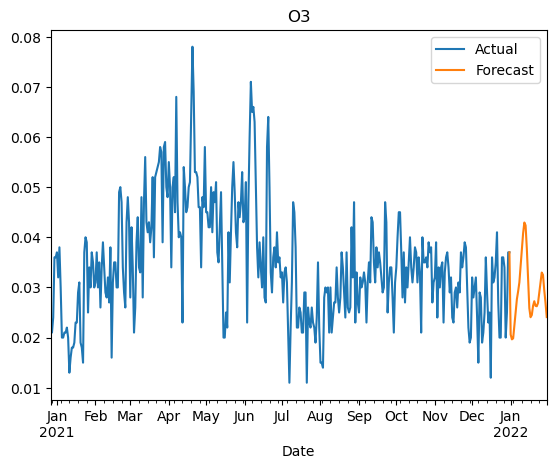

In [2131]:
# generate the forecasts
X_ = y_test2[- n_lookback:]  # last available input sequence
X_ = X_.reshape(1, n_lookback, 1)

Y_ = model.predict(X_).reshape(-1, 1)
Y_ = scaler.inverse_transform(Y_)

# organize the results in a data frame
df_past = df[['O3']].reset_index()
df_past.rename(columns={'DateTime': 'Date', 'O3': 'Actual'}, inplace=True)
df_past['Date'] = pd.to_datetime(df_past['Date'])
df_past['Forecast'] = np.nan
df_past['Forecast'].iloc[-1] = df_past['Actual'].iloc[-1]

df_future = pd.DataFrame(columns=['Date', 'Actual', 'Forecast'])
df_future['Date'] = pd.date_range(start=df_past['Date'].iloc[-1] + pd.Timedelta(days=1), periods=n_forecast)
df_future['Forecast'] = Y_.flatten()
df_future['Actual'] = np.nan

results = df_past.append(df_future).set_index('Date')

# plot the results
results.iloc[-400:].plot(title='O3')

In [ ]:
## Setting the dynamically changing learnin rate based on epochs number
# Set the learning rate scheduler
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))

history = model_tune.fit(dataset, epochs=100, callbacks=[lr_schedule])


# Define the learning rate array
lrs = 1e-8 * (10 ** (np.arange(100) / 20))

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the grid
plt.grid(True)

# Plot the loss in log scale
plt.semilogx(lrs, history.history["loss"])

# Increase the tickmarks size
plt.tick_params('both', length=10, width=1, which='both')

# Set the plot boundaries
plt.axis([1e-8, 1e-3, 0, 300])

#You will then set the optimizer with a learning rate close to the minimum. It is set to 4e-6 initially but feel free to change based on your results.

In [1310]:
x = [0,11,24,37,49,59]
print(x)
z = pm.utils.diff(x,lag=1,differences=1)
print(z)
z = np.insert(z,0,x[0])
print(z)
print(np.cumsum(z))

[0, 11, 24, 37, 49, 59]
[11. 13. 13. 12. 10.]
[ 0. 11. 13. 13. 12. 10.]
[ 0. 11. 24. 37. 49. 59.]
